# Imports

In [1]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from custom_functions import cramers_v_corr, correlation_ratio_corr
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

# Load data

In [2]:
# data types

numeric = [
    "age",
    "resting_blood_pressure",
    "cholesterol",
    "max_heart_rate",
    "st_depression",
    "stained_blood_vessels"
    ""
]

nominal = [
    "sex",
    "fasting_blood_sugar",
    "ecg",
    "exercise_induced_chest_pain",
    "blood_disorder",
    "st_slope",
    "chest_pain_type",
    "heart_disease",

]

feature_mapping = {
    "sex": ["Female", "Male"],
    "fasting_blood_sugar": ["Normal", "Abnormally High"],
    "exercise_induced_chest_pain": ["No Pain Observed", "Chest Pain Observed During Exercise"],
    "heart_disease": ["No Disease", "Heart Disease Present"],
    "ecg": ["Normal", "Abnormality Type A", "Abnormality Type B"],
    "blood_disorder": ["Normal", "Irreversible Damage", "Reversible Damage"],
    "chest_pain_type": ["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"],
}

In [3]:
heart_disease_df =  pd.read_csv("data 2.csv")

# Exploratory Data Analysis

### Null check

In [4]:
heart_disease_df.isnull().sum()

age                            0
sex                            0
chest_pain_type                0
resting_blood_pressure         0
cholesterol                    0
fasting_blood_sugar            0
ecg                            0
max_heart_rate                 0
exercise_induced_chest_pain    0
st_depression                  0
st_slope                       0
stained_blood_vessels          0
blood_disorder                 0
heart_disease                  0
dtype: int64

### Summary

In [5]:
heart_disease_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
chest_pain_type,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholesterol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fasting_blood_sugar,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
ecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exercise_induced_chest_pain,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
st_depression,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
# numeric columns describe
heart_disease_df[numeric].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholesterol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
st_depression,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
stained_blood_vessels,1025.0,0.754146,1.030798,0.0,0.0,0.0,1.0,4.0


In [7]:
# cat columns describe
heart_disease_df[nominal].astype("object").describe().transpose()

,count,unique,top,freq
sex,1025,2,1,713
fasting_blood_sugar,1025,2,0,872
ecg,1025,3,1,513
exercise_induced_chest_pain,1025,2,0,680
blood_disorder,1025,4,2,544
st_slope,1025,3,1,482
chest_pain_type,1025,4,0,497
heart_disease,1025,2,1,526


**Important: There is an extra label in blood disorder**

In [8]:
heart_disease_df_filtered = heart_disease_df[heart_disease_df["blood_disorder"]!=3]
heart_disease_df_filtered.shape

(615, 14)

In [58]:
heart_disease_df["heart_disease"].value_counts() # imbalance check

heart_disease
1    526
0    499
Name: count, dtype: int64

In [9]:
heart_disease_df_filtered["heart_disease"].value_counts() # imbalance check

heart_disease
1    436
0    179
Name: count, dtype: int64

### Duplicate check

In [10]:
heart_disease_df_filtered.duplicated().sum()

np.int64(430)

In [11]:
heart_disease_df_filtered_not_dup = heart_disease_df_filtered[~heart_disease_df_filtered.duplicated()]

In [ ]:
heart_disease_df_filtered_not_dup["heart_disease"].value_counts() #imbalance check

heart_disease
1    136
0     49
Name: count, dtype: int64

### numeric correlation: >= 0.6 cuttoff point 

<Axes: >

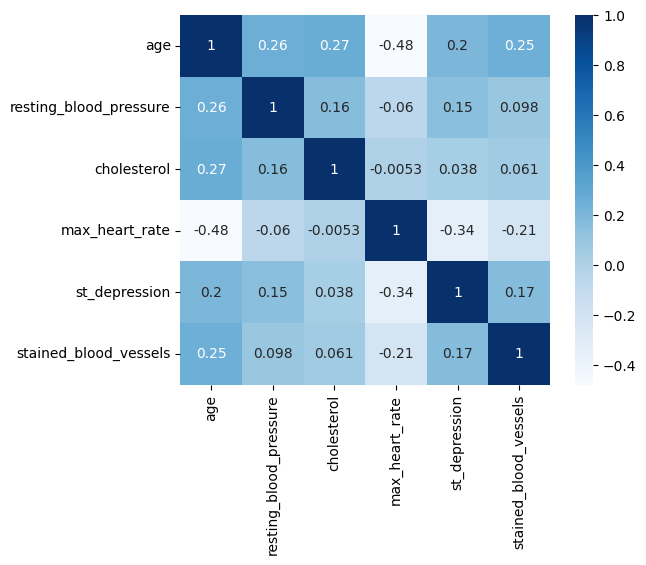

In [35]:
sns.heatmap(heart_disease_df_filtered[numeric].corr(), annot=True, cmap="Blues", square=True)

### Categorical association: cramers V –– 0.6 cutoff point

<Axes: >

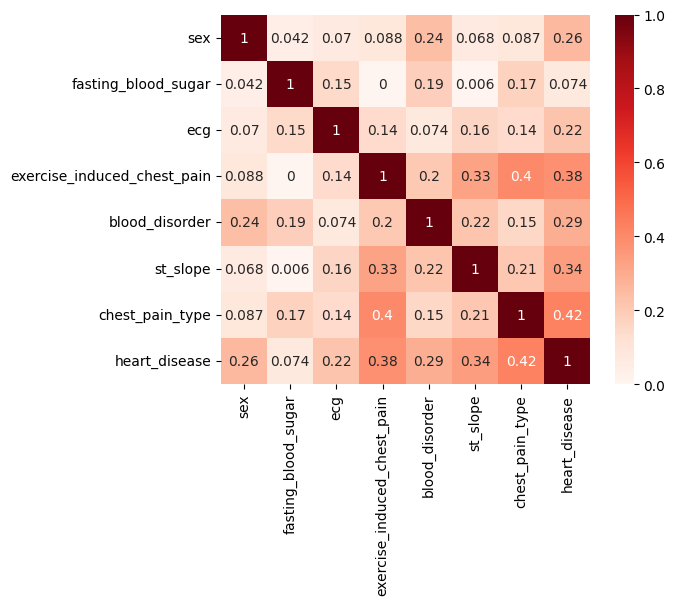

In [34]:
sns.heatmap(cramers_v_corr(heart_disease_df_filtered, nominal), annot=True, square=True, cmap="Reds")

### Categorical (for bipartition) and numerical correlation: >0.6 cutoff

<Axes: >

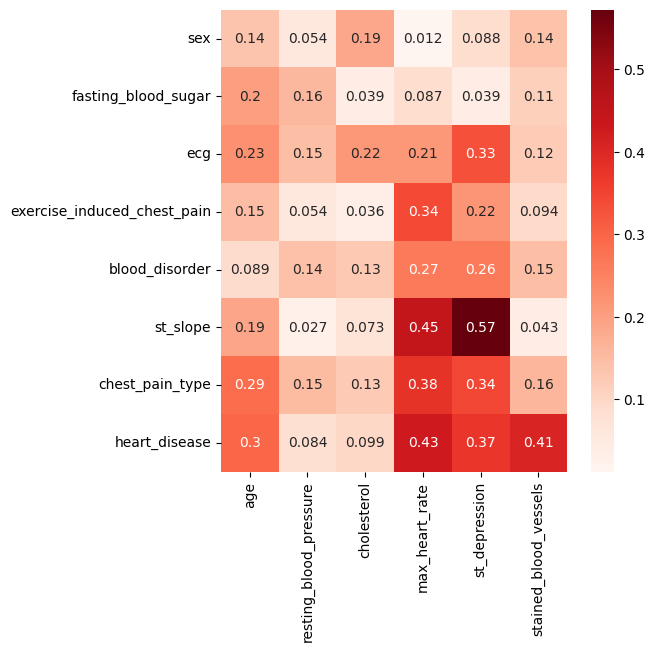

In [15]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_ratio_corr(heart_disease_df_filtered, numeric, nominal), annot=True, cmap="Reds", square=True)

### Distribution plots of features that are highly associated/correlated with the target.
plotting 3 for numeric and 3 for categorical

In [16]:
def hd_num_plot(df, x, hue): # to plot a histogram
  sns.histplot(data=df, x=x, hue=hue, element="step")
  plt.title(df[x].name)
  plt.xticks(fontsize=7)

def hd_nom_plot(df, x, hue): # to plot a histogram
  sns.countplot(data=df, x=x, hue=hue)
  plt.title(df[x].name)
  plt.xticks(fontsize=7)


#### Numeric

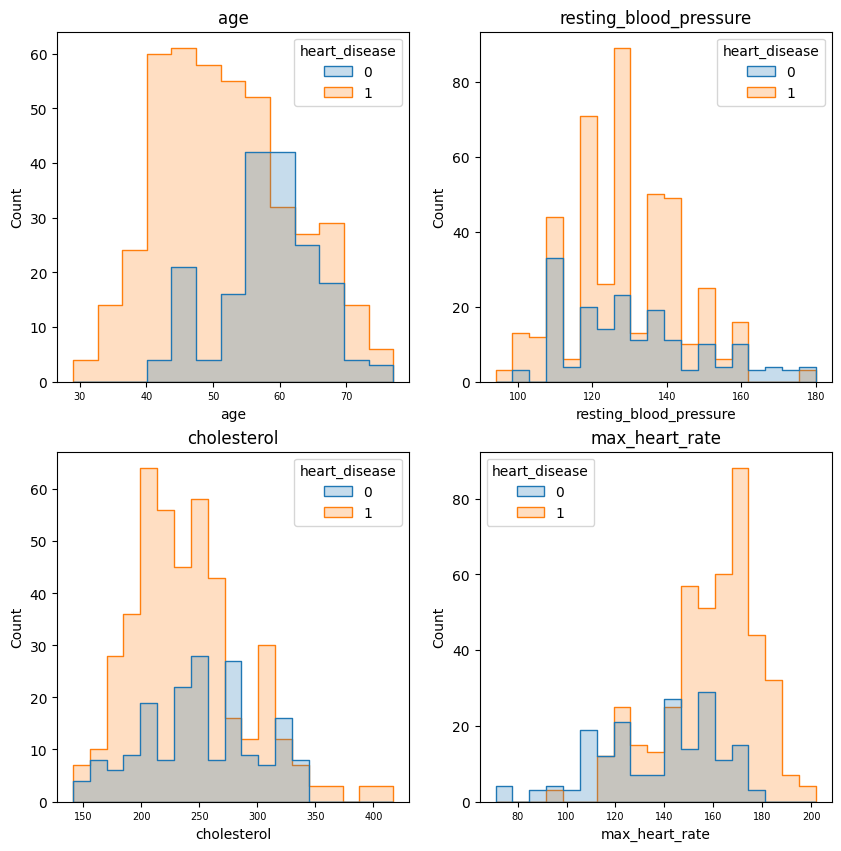

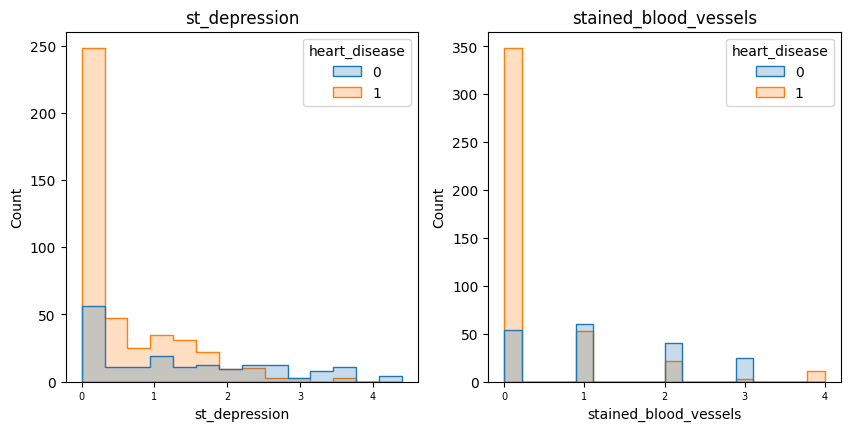

In [17]:
# display charts for the ord and num types
target = "heart_disease"
chart_positions = [221, 222, 223, 224]
counter = 0
for col_name in numeric: # excluding uid and bgli_segment

  if counter%4==0 and counter!=0:
    plt.show()
    plt.figure(figsize=(10, 10))
    print()
    counter=0
    plt.subplot(chart_positions[counter])
    hd_num_plot(heart_disease_df_filtered, col_name, target)
  else:
      if counter==0:
        plt.figure(figsize=(10, 10))
      plt.subplot(chart_positions[counter])
      hd_num_plot(heart_disease_df_filtered, col_name, target)

  counter+=1

#### Categorical

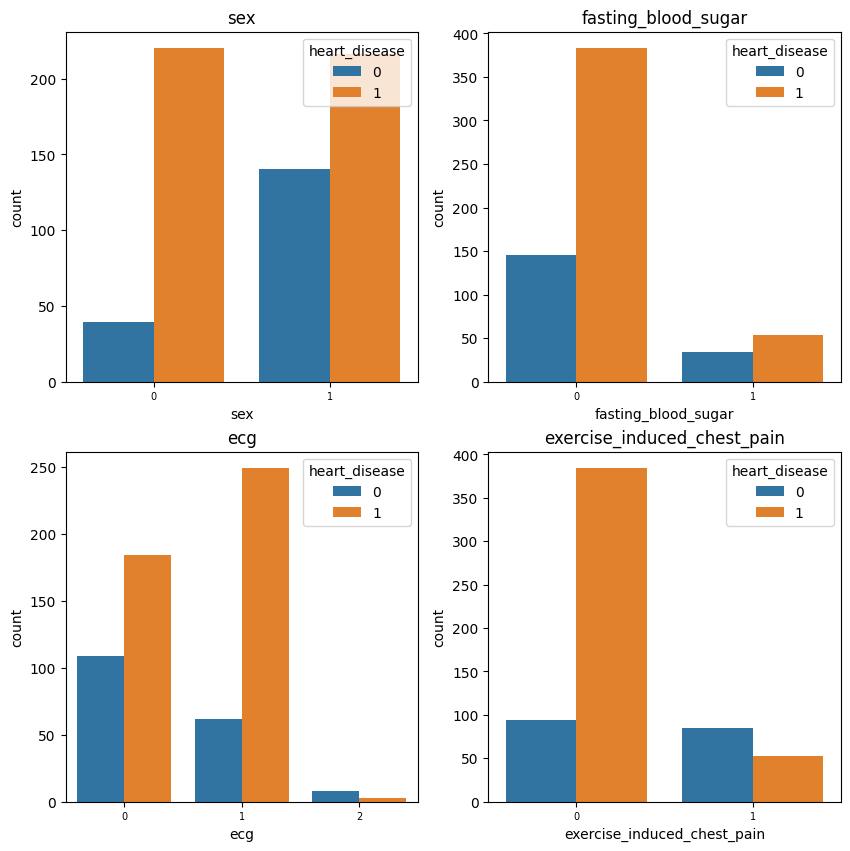

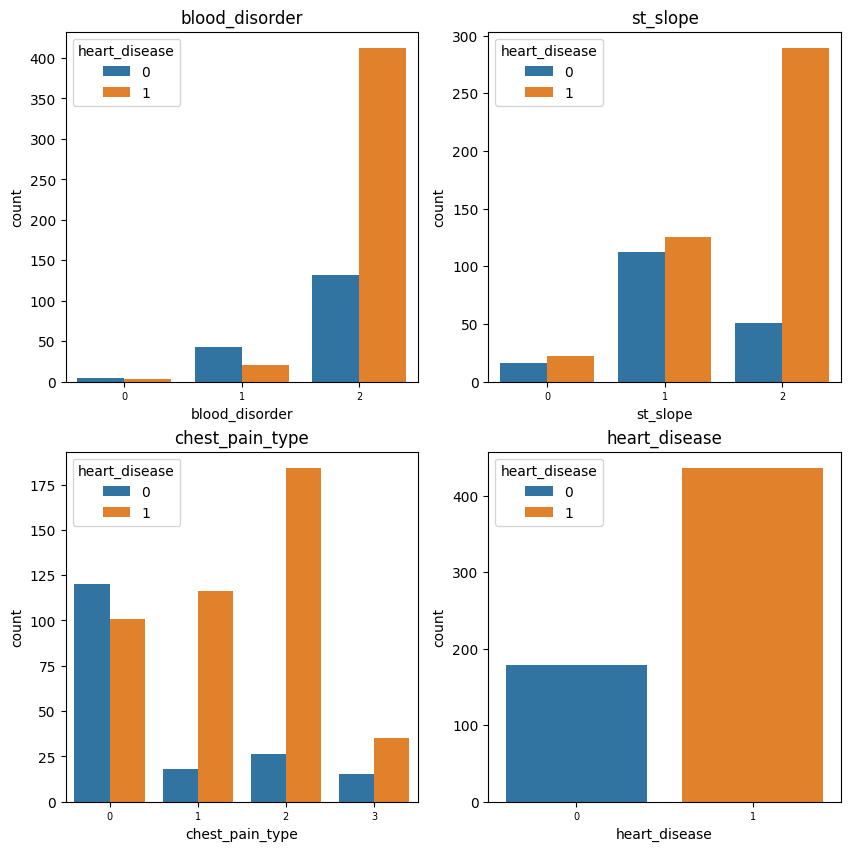

In [18]:
# display charts for the ord and num types
target = "heart_disease"
chart_positions = [221, 222, 223, 224]
counter = 0
for col_name in nominal: # excluding uid and bgli_segment

  if counter%4==0 and counter!=0:
    plt.show()
    plt.figure(figsize=(10, 10))
    print()
    counter=0
    plt.subplot(chart_positions[counter])
    hd_nom_plot(heart_disease_df_filtered, col_name, target)
  else:
      if counter==0:
        plt.figure(figsize=(10, 10))
      plt.subplot(chart_positions[counter])
      hd_nom_plot(heart_disease_df_filtered, col_name, target)

  counter+=1

# Data preprocessing

In [19]:
#remove extra label in blood disorder

heart_disease_df_cp_filtered = heart_disease_df[heart_disease_df["blood_disorder"]!=3].copy()

# resting_blood_pressure to binary
heart_disease_df_cp_filtered["resting_blood_pressure"] = heart_disease_df_cp_filtered["resting_blood_pressure"].apply(lambda x: 0 if x <=120 else 1)

#dummy features
heart_disease_df_cp_filtered[for_dummies] = heart_disease_df_cp_filtered[for_dummies:=["ecg", "blood_disorder", "st_slope", "chest_pain_type"]].astype("str")
heart_disease_df_cp_filtered =  pd.get_dummies(heart_disease_df_cp_filtered, columns=for_dummies, dtype=int)

#remove duplicates
heart_disease_df_cp_filtered_no_dup = heart_disease_df_cp_filtered.drop_duplicates(inplace=False)

# Model Building

##### Dataset splitting

In [20]:
# no dup
y_no_dup = heart_disease_df_cp_filtered_no_dup.heart_disease
predictors_no_dup = heart_disease_df_cp_filtered_no_dup.drop(["heart_disease"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors_no_dup, y_no_dup, random_state=100, test_size=0.2, stratify=y_no_dup)

In [21]:
# with dup
y_dup = heart_disease_df_filtered.heart_disease
predictors_dup = heart_disease_df_cp_filtered.drop(["heart_disease"], axis=1, inplace=False)

X_traind, X_testd, y_traind, y_testd = train_test_split(predictors_dup, y_dup, random_state=100, test_size=0.2, stratify=y_dup)

#### Model

In [22]:
rfc = RandomForestClassifier(random_state=100, class_weight="balanced")

##### Gridsearch

In [37]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=100)
param_grid_rfc = {'max_depth': list(range(2, 10)), 'n_estimators': list(range(5, 100, 5))}

In [54]:
# no dup
grid_search_rfc_no_dup = GridSearchCV(rfc, param_grid_rfc, cv=skf, scoring=["f1", "recall"], refit="recall", n_jobs=-1)
grid_search_rfc_no_dup.fit(X_train, y_train)

print("Optimal Depth:", grid_search_rfc_no_dup.best_params_['max_depth'],
      "Optimal n_estimator:", grid_search_rfc_no_dup.best_params_['n_estimators']
)

print(grid_search_rfc_no_dup.best_score_)


Optimal Depth: 7 Optimal n_estimator: 30
0.9724724724724725


In [55]:
# with dup
grid_search_rfc_dup = GridSearchCV(rfc, param_grid_rfc, cv=skf, scoring=["f1", "recall"], refit="recall", n_jobs=-1)
grid_search_rfc_dup.fit(X_traind, y_traind)

print("Optimal Depth:", grid_search_rfc_dup.best_params_['max_depth'],
      "Optimal n_estimator:", grid_search_rfc_dup.best_params_['n_estimators']
)

print(grid_search_rfc_dup.best_score_)


Optimal Depth: 9 Optimal n_estimator: 55
0.9943019943019943


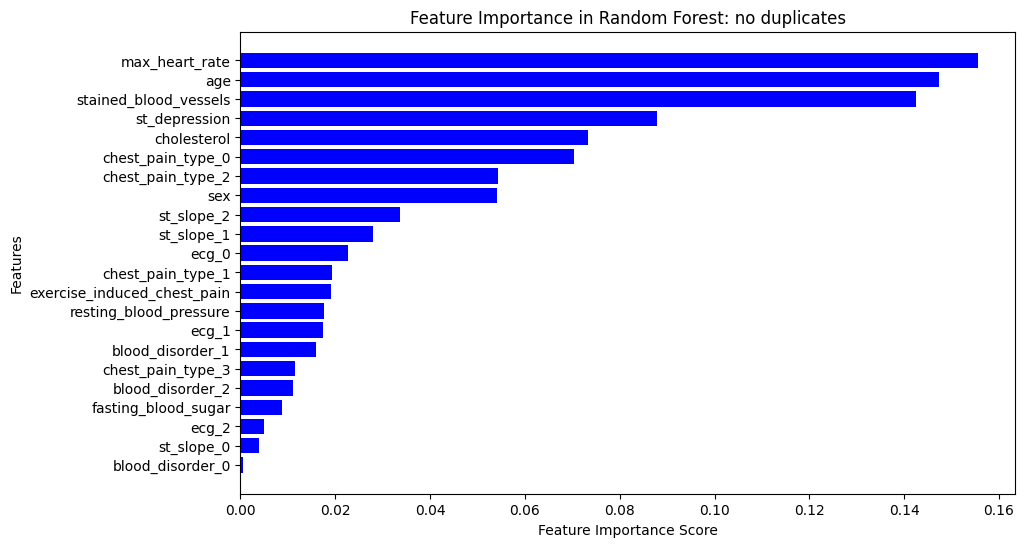

In [49]:
#feature importance # NO DUPLICATES

# Get Feature Importance
feature_importance = pd.DataFrame({'Feature': predictors_no_dup.columns, 'Importance': grid_search_rfc_no_dup.best_estimator_.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest: no duplicates")
plt.gca().invert_yaxis()  # Invert Y-axis for descending order
plt.show()

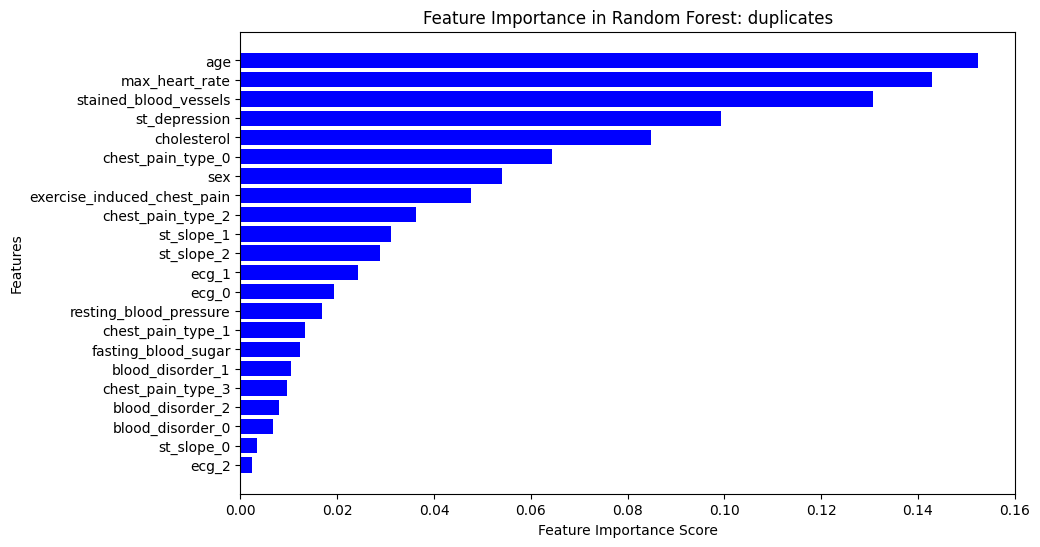

In [50]:
#feature importance # DUPLICATES

# Get Feature Importance
feature_importance = pd.DataFrame({'Feature': predictors_dup.columns, 'Importance': grid_search_rfc_dup.best_estimator_.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest: duplicates")
plt.gca().invert_yaxis()  # Invert Y-axis for descending order
plt.show()

#### training on the complete dataset

In [44]:
best_rfc = grid_search_rfc_no_dup.best_estimator_.fit(X_train, y_train)
best_rfcd = grid_search_rfc_dup.best_estimator_.fit(X_traind, y_traind)

##### Testing the data

In [ ]:
#testing duplicated data
y_pred_v0 = best_rfc.predict(X_testd)
y_pred_v1 = best_rfcd.predict(X_testd)

print("trained without duplicates")
print(classification_report(y_testd, y_pred_v0))

print("trained with duplicates")
print(classification_report(y_testd, y_pred_v1))

trained without duplicates
              precision    recall  f1-score   support

           0       0.97      0.83      0.90        36
           1       0.93      0.99      0.96        87

    accuracy                           0.94       123
   macro avg       0.95      0.91      0.93       123
weighted avg       0.94      0.94      0.94       123

trained duplicates
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        87

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [52]:
#testing non-duplicated data
y_pred = best_rfc.predict(X_test)
y_predd = best_rfcd.predict(X_test)

print("trained without duplicates")
print(classification_report(y_test, y_pred))

print("trained with duplicates")
print(classification_report(y_test, y_predd))

trained without duplicates
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.78      0.93      0.85        27

    accuracy                           0.76        37
   macro avg       0.69      0.61      0.62        37
weighted avg       0.73      0.76      0.73        37

trained with duplicates
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        27

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



### Finalisation

<Axes: >

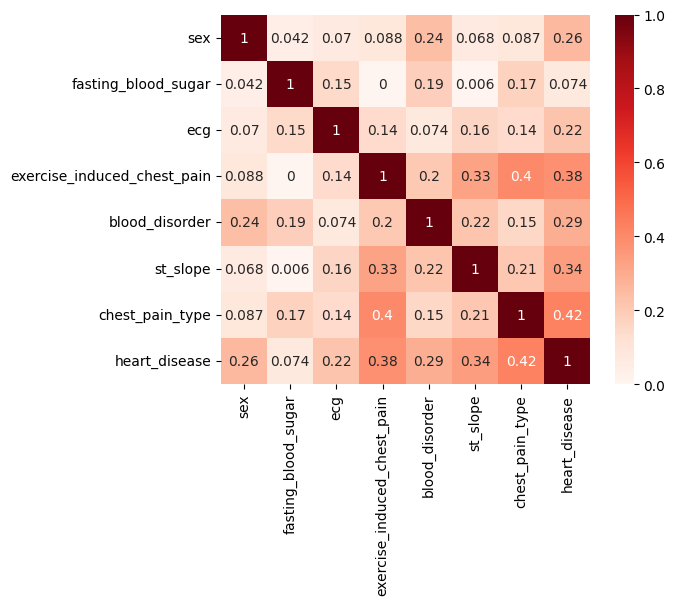

In [56]:
sns.heatmap(cramers_v_corr(heart_disease_df_filtered, nominal), annot=True, square=True, cmap="Reds")

<Axes: >

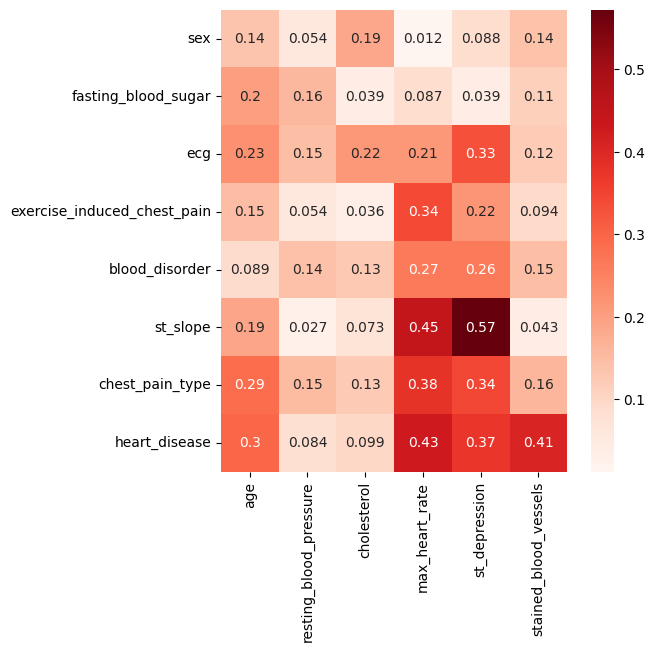

In [57]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_ratio_corr(heart_disease_df_filtered, numeric, nominal), annot=True, cmap="Reds", square=True)

**Most contributing features in the model:**

1. max_heart_rate
2. age
3. blood stained vessels
4. st_depression
5. cholesterol

**Correlated features in regards to heart disease target:**

categotical
* chest_pain_type
* chest_induced_chest_pain
* st_slope

numerical
* max_heart_rate
* stained_blood_vessels
* st_depression
* age